# ORG_Pubs

Simple script to get info about pub output for a speicific institution from OpenAlex.

In [26]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set parameters. Years are set to 2001 to 2024. To do: Make institution configurable.

In [27]:
# Define base URL
base_url = "https://api.openalex.org/works?page=1&filter=authorships.institutions.lineage:I140025399,publication_year:"

# List of years
years = list(range(2001, 2024))

# Store the metadata counts
metadata_counts = []



Get and sort data. Each year is queried. Not sure if it is possible in a more elegant way. Print per year to see if it works.

In [28]:
# Store the metadata counts
metadata_counts = []

# Iterate through the list of years
for year in years:
    # Create the API URL for the institution and specific year
    api_url = base_url + str(year)

    # Make the API request
    response = requests.get(api_url)

    # Check if the response is successful (status code 200)
    if response.status_code == 200:
        data = response.json()

        # Get the count of works from the response
        count = data["meta"]["count"]

        # Append the information for the year to the list
        metadata_counts.append({"year": year, "publications": count})

        
        # Print the progress
        print(f"year: {year}, publications: {count}")


Year: 2001, Publications: 56
Year: 2002, Publications: 38
Year: 2003, Publications: 49
Year: 2004, Publications: 73
Year: 2005, Publications: 37
Year: 2006, Publications: 61
Year: 2007, Publications: 47
Year: 2008, Publications: 58
Year: 2009, Publications: 48
Year: 2010, Publications: 95
Year: 2011, Publications: 65
Year: 2012, Publications: 84
Year: 2013, Publications: 56
Year: 2014, Publications: 107
Year: 2015, Publications: 95
Year: 2016, Publications: 142
Year: 2017, Publications: 136
Year: 2018, Publications: 115
Year: 2019, Publications: 129
Year: 2020, Publications: 105
Year: 2021, Publications: 115
Year: 2022, Publications: 135
Year: 2023, Publications: 119


Create a dataframe to make data manipulation and visualization easy.

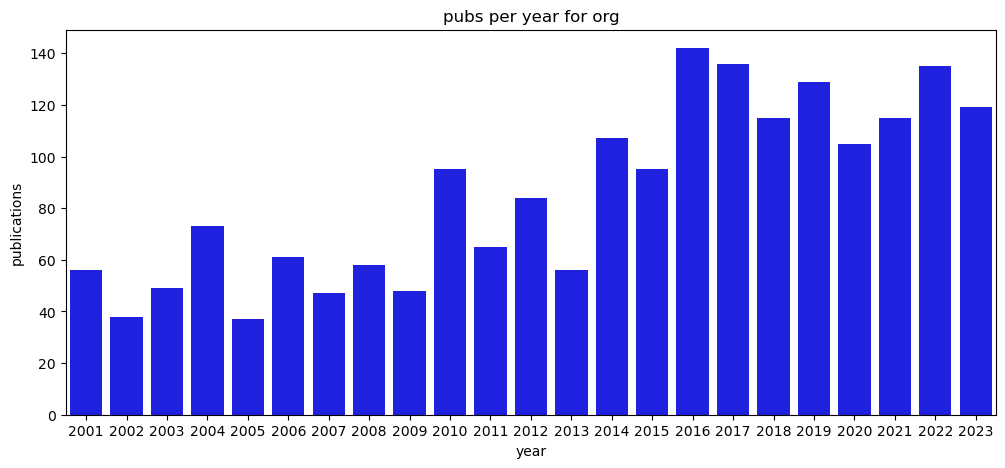

In [35]:
# Check if the metadata_counts list is not empty before creating the DataFrame
if metadata_counts:
    # Create a DataFrame from the metadata counts
    metadata_df = pd.DataFrame(metadata_counts)

    # Convert 'Year' column to numeric
    metadata_df['Year'] = pd.to_numeric(metadata_df['Year'])

    # Create a bar chart of publications per year
    plt.figure(figsize=(12, 5))
    sns.barplot(x='Year', y='publications', data=metadata_df, color='blue')
    plt.title('pubs per year for org')
    plt.xlabel('year')
    plt.ylabel('publications')
    plt.show()
else:
    print("Nothing found")

That's it for now. 